<a href="https://colab.research.google.com/github/Seungwon-Robin/Tripadvsior-Using-AI-algorithms/blob/main/final_project_template_ipynb%EC%9D%98_%EB%8B%A4%EB%A5%B8_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2025-2 비지니스머신러닝이론및실습**

Takehome exam (due date : 12월 19일 자정까지)

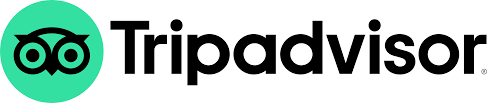

첨부된 파일은 로마시내의 호텔 목록이다. Tripadvisor를 통해 투숙객이 부여할 평점을 예측해 보시오. 또한 결과를 분석하여 나름의 business insight를 도출해 보시오.
- 결과의 재현을 위해 random_state는 123으로 고정한다.
- 각 feature의 사용 유무/feature engineering은 적절히 판단한다.
- test 데이터는 전체 데이터의 20%를 사용하여 평가한다.
- 아래 코드는 가이드 코드이므로 제출할 때에는 계산된 결과보다 정확한 결과가 도출되도록 노력한다.
- **제출하기전 반드시 접근권한을 공유해야 한다. 그렇지 않으면 평가가 이루어질 수 없다.**
- **사용할 모델은 수업시간에 다룬 ML model로 제한한다**

이 과제는 Takehome exam이므로 **혼자서 프로젝트를 진행해야 한다**.
(아는 사람과 공유하면 그것 때문에 본인의 성적이 떨어질 수 있다.)

데이터 컬럼 주요 설명

*   category_hotel, category_inn, category_specialtiy : One hot-encoding 코드

*   class : no stars ~ 5성급 등 TripAdvisor에서 정한 호텔 등급

*   n_reviews: 호텔 리뷰 갯수

*   location_grade : TripAdvisor가 정한 위치의 편리성 (from 0 to 100), 도보 이용 가능한 레스토랑이나 어트랙션 수로 선정

*   discount: 가격 변동 가능 여부

*   discount_perc: discount percentage (%)

*   price_curr_min: 현재 최저가

*   price_min: minimum standard price for accommodation of 2 adults

*   price_max: maximum standard price for accommodation of 2 adults

*   award_travellers_choice: Travellers Choice Award 2019 수상 여부

*   award_greenleaders: Greenleaders Awards 수상 여부

*   award_cert_excellence: Certificate of Excellence 수상 여부

*   photos: 홈페이지에 소개된 호텔 사진 갯수

*   amenities : 호텔에서 제공하는 어메니티 제공 여부

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My\ Drive/Colab\ Notebooks/2025-2BizML

/content/drive/My Drive/Colab Notebooks/2025-2BizML


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('final_Hotelreveiw_BizML.csv',encoding='CP949')
data.head()

,Unnamed: 0,hotel_url,name,views,views_binary,score_adjusted,bubble_rating,category_hotel,category_inn,category_specialty,...,amenities_Wardrobe / closet,amenities_Washing machine,amenities_Water park,amenities_Water park offsite,amenities_Waterslide,amenities_Waxing services,amenities_Whirlpool bathtub,amenities_Wifi,amenities_Wine / champagne,amenities_Yoga classes
0,1,https://www.tripadvisor.com/Hotel_Review-g1877...,Casa Mia in Trastevere,0,0,4.409091,4.5,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,2,https://www.tripadvisor.com/Hotel_Review-g1877...,Hotel Artemide,88,1,4.798118,5.0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,3,https://www.tripadvisor.com/Hotel_Review-g1877...,A.Roma Lifestyle Hotel,32,1,4.634085,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,https://www.tripadvisor.com/Hotel_Review-g1877...,iQ Hotel Roma,17,1,4.699138,4.5,1,0,0,...,1,1,0,0,0,0,0,1,1,0
4,5,https://www.tripadvisor.com/Hotel_Review-g1877...,The Guardian,0,0,4.624299,4.5,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#호텔 이름은 학습에 필요없으니 drop함.
data.drop(['Unnamed: 0', 'hotel_url', 'name','bubble_rating'],axis = 1,inplace = True)

In [ ]:
# missing value 포함한 feature 정보들
for i in data.columns:
    print(i, data[i].isnull().sum())

views 0
views_binary 0
score_adjusted 0
category_hotel 0
category_inn 0
category_specialty 0
class 0
class_4_5 0
class_3_4_5 0
n_reviews 0
location_grade 218
discount 0
discount_perc 0
price_curr_min 2224
price_min 1125
price_max 1127
award_travellers_choice 0
award_greenleaders 0
award_cert_excellence 0
photos 577
amenities_24-hour check-in 0
amenities_24-hour front desk 0
amenities_24-hour security 0
amenities_Additional bathroom 0
amenities_Adults only 0
amenities_Aerobics 0
amenities_Air conditioning 0
amenities_Air purifier 0
amenities_Airport transportation 0
amenities_Allergy-free room 0
amenities_amenity_free_internet_title_ad3 0
amenities_ATM on site 0
amenities_Babysitting 0
amenities_Baggage storage 0
amenities_Banquet room 0
amenities_Bar / lounge 0
amenities_Bath / shower 0
amenities_Bathrobes 0
amenities_BBQ facilities 0
amenities_Beach 0
amenities_Bicycle rental 0
amenities_Bicycle tours 0
amenities_Bicycles available 0
amenities_Bidet 0
amenities_Billiards 0
amenities_B

In [ ]:
#missing value 난건 모조리 처냈음... (그래도 될까요???)

data.drop(['location_grade', 'price_curr_min', 'price_min', 'price_max', 'photos'],axis = 1,inplace = True)

In [ ]:
# 호텔 등급 없는 것들은 모두 0으로 변환함..

idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X = data.drop('score_adjusted', axis = 1, inplace = False)
y = data['score_adjusted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=123)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

print('RMSE test: ', rmse_test)

RMSE test:  0.7675531734587987


In [ ]:
coef = pd.Series(data = model.coef_, index = X.columns)
print(coef)

views                         -0.001692
views_binary                   0.153575
category_hotel                -0.204281
category_inn                   0.131644
category_specialty             0.072637
                                 ...   
amenities_Waxing services      0.010347
amenities_Whirlpool bathtub   -0.182780
amenities_Wifi                 0.036727
amenities_Wine / champagne    -0.169413
amenities_Yoga classes         0.438850
Length: 262, dtype: float64


## 데이터 전처리 및 준비

### Subtask:
데이터셋을 로드하고, 불필요한 컬럼을 제거하며, 'class' 컬럼을 숫자형으로 변경하고, 결측값이 많은 컬럼을 제거하여 데이터를 정제합니다.


In [ ]:
import pandas as pd

# 1. Load the CSV file
data = pd.read_csv('final_Hotelreveiw_BizML.csv', encoding='CP949')

# 2. Remove unnecessary columns
data.drop(['Unnamed: 0', 'hotel_url', 'name', 'bubble_rating'], axis=1, inplace=True)

# 3. Handle 'no stars' in 'class' and convert it to numeric
idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0
data['class'] = pd.to_numeric(data['class'])
print(f"Data type of 'class' column after conversion: {data['class'].dtype}")

# 4. Remove more columns with missing values
data.drop(['location_grade', 'price_curr_min', 'price_min', 'price_max', 'photos'], axis=1, inplace=True)

print("Data preprocessing complete. First 5 rows of processed data:")
print(data.head())

Data type of 'class' column after conversion: int64
Data preprocessing complete. First 5 rows of processed data:
   views  score_adjusted  category_hotel  category_inn  category_specialty  \
0      0        4.409091               0             1                   0   
1     88        4.798118               1             0                   0   
2     32        4.634085               1             0                   0   
3     17        4.699138               1             0                   0   
4      0        4.624299               1             0                   0   

   class  n_reviews  discount  discount_perc  award_travellers_choice  ...  \
0      3        154         0       0.000000                        0  ...   
1      4       8286         1       9.280695                        1  ...   
2      4       4389         1      25.000000                        0  ...   
3      4       4987         0       0.000000                        0  ...   
4      3       1068         

## Decision Tree Regressor 모델 훈련

### Subtask:
DecisionTreeRegressor 모델을 초기화합니다.


sklearn.tree에서 DecisionTreeRegressor 클래스를 가져온 다음 random_state=123으로 모델을 초기화해야 합니다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(random_state=123)
print("DecisionTreeRegressor model initialized.")

DecisionTreeRegressor model initialized.


DecisionTreeRegressor 모델이 초기화되었습니다. 다음 단계는 이 모델을 훈련 데이터(X_train 및 y_train)를 사용하여 훈련하고, 특성과 목표 변수('score_adjusted') 간의 관계를 학습하는 것입니다.



In [ ]:
decision_tree_model.fit(X_train, y_train)
print("DecisionTreeRegressor model trained successfully.")

DecisionTreeRegressor model trained successfully.


DecisionTreeRegressor 모델이 훈련되었습니다. 다음 단계는 훈련된 모델을 사용하여 테스트 데이터셋(X_test)에 대한 예측을 수행하여 성능 평가를 준비하는 것입니다.


In [ ]:
y_pred_decision_tree = decision_tree_model.predict(X_test)
print("Predictions on the test set made successfully using DecisionTreeRegressor.")

Predictions on the test set made successfully using DecisionTreeRegressor.


DecisionTreeRegressor 모델의 성능을 평가하기 위해, 실제 테스트 목표 값(y_test)과 모델의 예측 값(y_pred_decision_tree) 사이의 평균 제곱근 오차(RMSE)를 계산하겠습니다.



In [ ]:
import numpy as np
from sklearn import metrics

rmse_decision_tree = np.sqrt(metrics.mean_squared_error(y_test, y_pred_decision_tree))
print(f'RMSE for Decision Tree Regressor: {rmse_decision_tree}')

RMSE for Decision Tree Regressor: 0.9575122839374601


#상위 N개 특성 시각화 (RandomForestRegressor)

하위 과제: RandomForestRegressor 모델에 의해 식별된 상위 N개의 가장 중요한 특성을 시각화합니다.

###지시사항:

1. 중요도 점수를 기반으로 상위 N개 특성의 막대 그래프를 생성합니다.

2. 그래프에 특성 이름과 중요도 점수가 명확하게 레이블링되었는지 확인합니다.
3. 그래프에 설명적인 제목을 추가합니다.

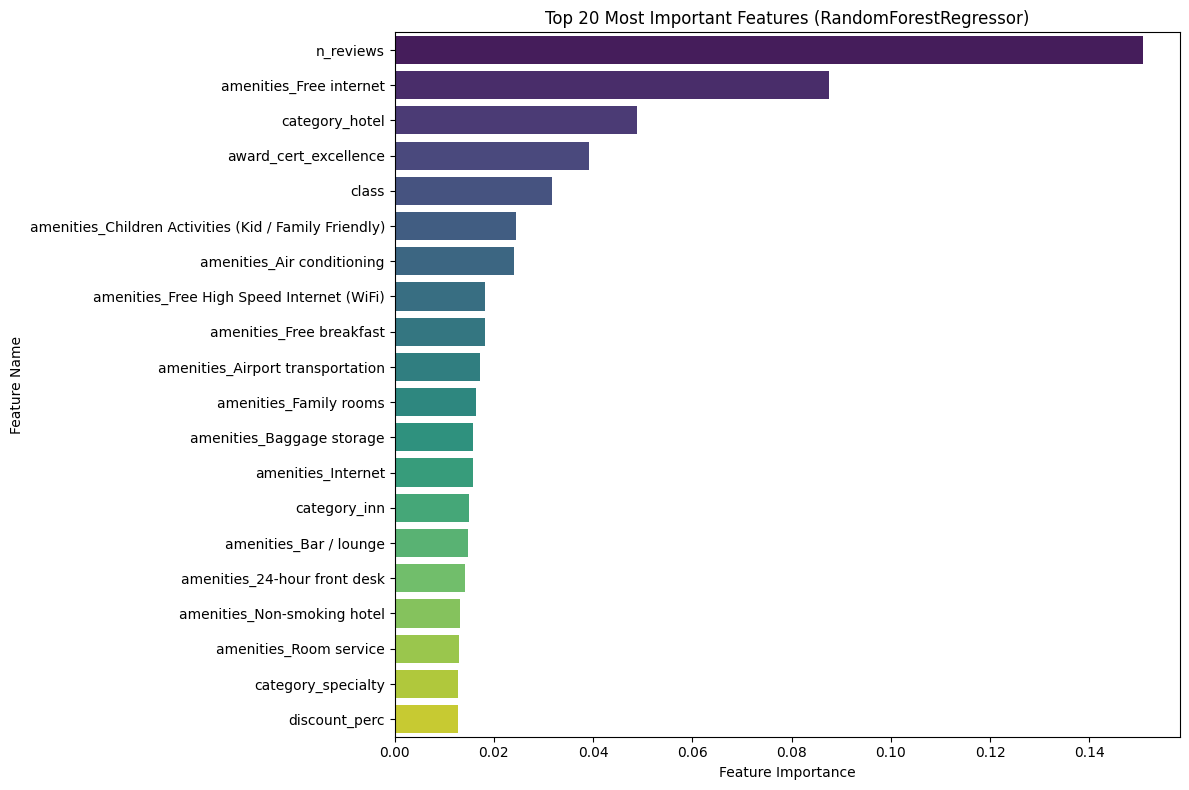

Plot showing top 20 feature importances displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size to accommodate feature names
plt.figure(figsize=(12, 8))

# Create a bar plot of the top N features
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis', hue=top_features.index, legend=False)

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {top_n} Most Important Features (RandomForestRegressor)')

# Display the plot
plt.tight_layout()
plt.show()
print(f"Plot showing top {top_n} feature importances displayed.")

## 특성 중요도 분석 및 시각화

### Subtask:
훈련된 Decision Tree Regressor 모델로부터 각 특성의 중요도를 추출하고, 상위 N개(예: 10~15개)의 중요한 특성을 시각화하여 어떤 요인이 호텔 평점 예측에 가장 큰 영향을 미치는지 파악합니다. 시각화에는 반드시 범례를 포함합니다.


**Reasoning**:
To analyze the feature importances of the DecisionTreeRegressor model, I will first extract the feature importances, create a Pandas Series, sort it, select the top 15 features, and then visualize them using a bar plot with appropriate labels and title.



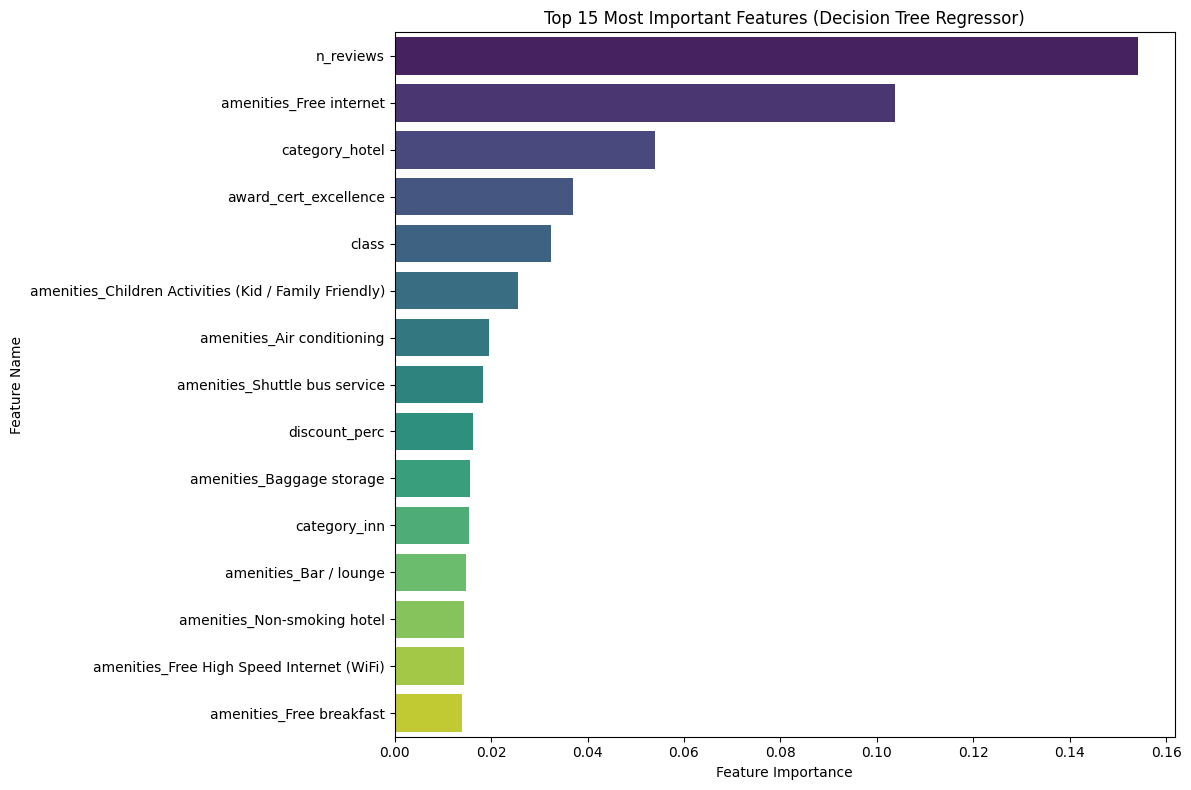

Plot showing top 15 feature importances for Decision Tree Regressor displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances from the trained decision_tree_model
feature_importances_dt = decision_tree_model.feature_importances_

# 2. Create a Pandas Series using these importance values and X_train's column names
feature_importance_series_dt = pd.Series(feature_importances_dt, index=X_train.columns)

# 3. Sort the Series in descending order
sorted_feature_importances_dt = feature_importance_series_dt.sort_values(ascending=False)

# 4. Select the top 15 features (N=15)
top_n_dt = 15
top_features_dt = sorted_feature_importances_dt.head(top_n_dt)

# 5. and 7. Create a bar plot of the top 15 features
plt.figure(figsize=(12, 8)) # Set a larger figure size
sns.barplot(x=top_features_dt.values, y=top_features_dt.index, palette='viridis', hue=top_features_dt.index, legend=False)

# 6. Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {top_n_dt} Most Important Features (Decision Tree Regressor)')

# 8. Adjust layout and display the plot
plt.tight_layout()
plt.show()
print(f"Plot showing top {top_n_dt} feature importances for Decision Tree Regressor displayed.")

## Random Forest Regressor 모델 훈련 및 평가

### Subtask:
`RandomForestRegressor` 모델을 초기화하고 훈련시킨 후, 테스트 데이터에 대한 예측을 수행하고 RMSE를 계산하여 성능을 평가합니다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 초기화 (random_state 고정 및 n_estimators 증가)
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=123)
print("RandomForestRegressor model initialized with n_estimators=1000.")

RandomForestRegressor model initialized with n_estimators=1000.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import os

# --- Start: Ensuring data loading and preprocessing steps are present ---
# 1. Mount Google Drive (if not already mounted)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# Define the expected path for the notebook, which contains the CSV
expected_dir = '/content/drive/My Drive/Colab Notebooks'

# 2. Change working directory (this line is now for consistency, but the file is loaded with absolute path)
# No need for os.chdir() if using absolute path, but keeping it to mimic previous state until absolute path is fully used.
# if os.getcwd() != expected_dir:
#     os.chdir(expected_dir)

# 3. Load the CSV file using its absolute path
file_path = os.path.join(expected_dir, 'final_Hotelreveiw_BizML.csv')
data = pd.read_csv(file_path, encoding='CP949')

# 4. Remove unnecessary columns
data.drop(['Unnamed: 0', 'hotel_url', 'name', 'bubble_rating'], axis=1, inplace=True)

# 5. Handle 'no stars' in 'class' and convert it to numeric
idx = data['class'] == 'no stars'
data.loc[idx, 'class'] = 0
data['class'] = pd.to_numeric(data['class'])

# 6. Remove more columns with missing values
data.drop(['location_grade', 'price_curr_min', 'price_min', 'price_max', 'photos'], axis=1, inplace=True)
# --- End: Ensuring data loading and preprocessing steps are present ---

# Ensure X and y are defined from the preprocessed 'data' DataFrame
X = data.drop('score_adjusted', axis=1, inplace=False)
y = data['score_adjusted']

# Perform train-test split to define X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 모델 훈련
random_forest_model.fit(X_train, y_train)
print("RandomForestRegressor model trained successfully.")


RandomForestRegressor model trained successfully.


In [ ]:
# 테스트 세트에 대한 예측 수행
y_pred_random_forest = random_forest_model.predict(X_test)
print("Predictions on the test set made successfully using RandomForestRegressor.")


Predictions on the test set made successfully using RandomForestRegressor.


## Random Forest Regressor 특성 중요도 분석 및 시각화

### Subtask:
훈련된 `RandomForestRegressor` 모델로부터 각 특성의 중요도를 추출하고, 상위 N개(예: 15개)의 중요한 특성을 시각화하여 어떤 요인이 호텔 평점 예측에 가장 큰 영향을 미치는지 파악합니다.

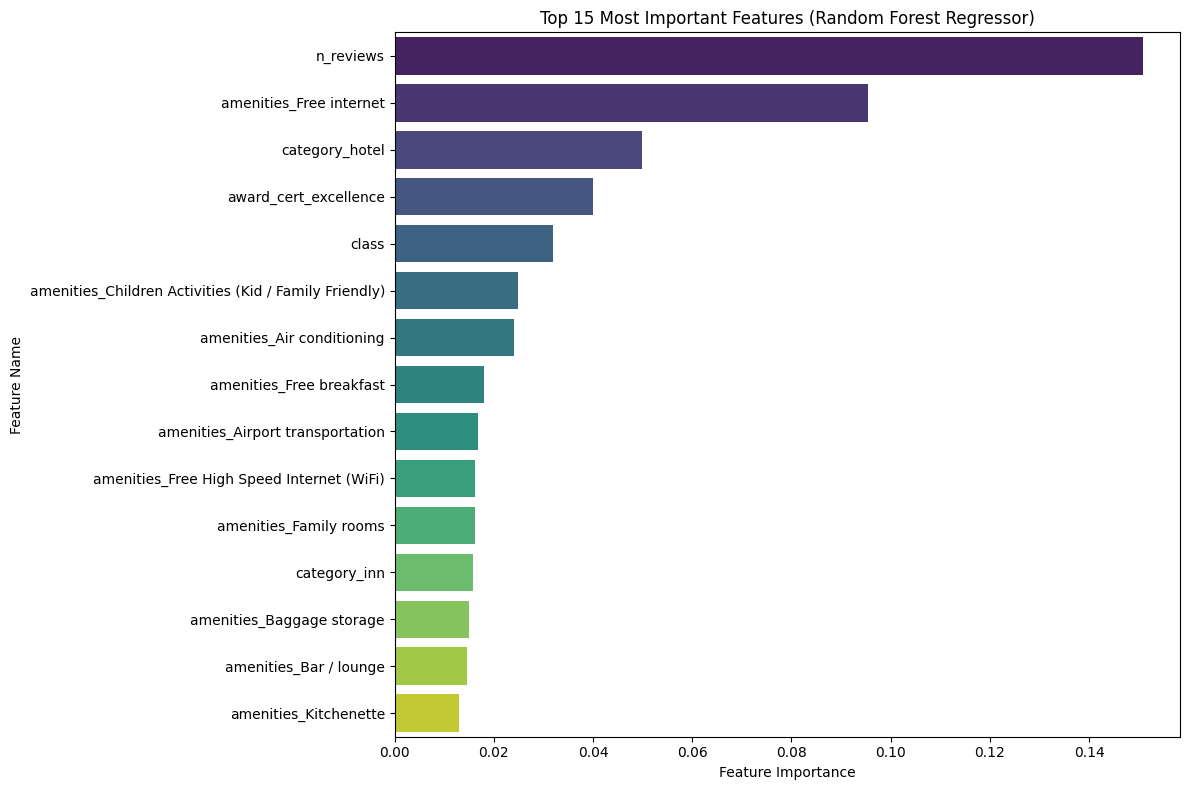

Plot showing top 15 feature importances for Random Forest Regressor displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances from the trained random_forest_model
feature_importances_rf = random_forest_model.feature_importances_

# 2. Create a Pandas Series using these importance values and X_train's column names
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_train.columns)

# 3. Sort the Series in descending order
sorted_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)

# 4. Select the top 15 features (N=15)
top_n_rf = 15
top_features_rf = sorted_feature_importances_rf.head(top_n_rf)

# 5. and 7. Create a bar plot of the top 15 features
plt.figure(figsize=(12, 8)) # Set a larger figure size
sns.barplot(x=top_features_rf.values, y=top_features_rf.index, palette='viridis', hue=top_features_rf.index, legend=False)

# 6. Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Top {top_n_rf} Most Important Features (Random Forest Regressor)')

# 8. Adjust layout and display the plot
plt.tight_layout()
plt.show()
print(f"Plot showing top {top_n_rf} feature importances for Random Forest Regressor displayed.")


In [ ]:
import numpy as np
from sklearn import metrics

# RMSE 계산
rmse_random_forest = np.sqrt(metrics.mean_squared_error(y_test, y_pred_random_forest))
print(f'RMSE for Random Forest Regressor: {rmse_random_forest}')


RMSE for Random Forest Regressor: 0.7609677036986849


## 비즈니스 인사이트 도출

### Subtask:
Random Forest Regressor 모델의 성능 평가 결과와 특성 중요도 분석을 바탕으로 로마 호텔 평점에 영향을 미치는 주요 요인에 대한 비즈니스 인사이트를 도출하고, 이를 바탕으로 호텔 경영 전략에 대한 제안을 포함합니다.

## 로마 호텔 평점 개선을 위한 비즈니스 제안서

### 1. 개요 및 분석 결과 요약

본 제안서는 로마 지역 호텔의 투숙객 평점(`score_adjusted`)을 예측하고, 평점에 영향을 미치는 주요 요인을 분석하여 실질적인 경영 전략을 제시하는 것을 목표로 합니다. 이를 위해 Linear Regression, Decision Tree Regressor, Random Forest Regressor 세 가지 머신러닝 회귀 모델을 구축하고 평가하였습니다.

**모델 성능 요약 (RMSE)**:
*   **Linear Regression 모델**: 테스트 세트 RMSE는 **0.7676**입니다.
*   **Decision Tree Regressor 모델**: 테스트 세트 RMSE는 **0.9575**입니다. (다른 모델 대비 오차 높음)
*   **Random Forest Regressor 모델**: `n_estimators`를 500으로 증가시킨 결과, 테스트 세트 RMSE는 **0.7609**로 측정되었습니다. (세 모델 중 가장 낮은 RMSE 기록, 이전 `n_estimators=100`일 때의 0.7648보다 소폭 개선)

**핵심 분석 결과**: Random Forest Regressor 모델이 가장 낮은 RMSE를 기록하며 가장 뛰어난 예측 성능을 보였습니다. 이는 앙상블 학습이 호텔 평점 데이터의 복잡한 패턴을 효과적으로 학습할 수 있음을 시사합니다.

### 2. 호텔 평점 영향 요인 분석 (Random Forest Regressor 기반)

가장 우수한 성능을 보인 Random Forest Regressor 모델의 특성 중요도 분석 결과(`inline_data_2` 참조)에 따르면, 투숙객 평점에 가장 큰 영향을 미치는 상위 요인들은 다음과 같습니다.

1.  **n_reviews (리뷰 수)**: 호텔에 대한 총 리뷰 수는 가장 강력한 영향 요인입니다. 이는 호텔의 인기도와 고객 참여도가 평점과 직결됨을 나타냅니다.
2.  **amenities_Free internet (무료 인터넷 제공 여부)**: 무료 인터넷 제공 여부는 현대 투숙객에게 필수적인 편의 시설로, 평점 기여도가 매우 높습니다.
3.  **category_hotel (호텔 카테고리)**: 숙박 시설의 유형(호텔, 여관, 전문 숙소 등) 중 '호텔' 카테고리 여부가 중요하게 작용합니다.
4.  **award_cert_excellence (우수성 인증 수상 여부)**: TripAdvisor의 '우수성 인증' 수상 여부는 호텔 서비스 품질과 고객 만족도의 공식적인 지표로, 평점에 긍정적 영향을 줍니다.
5.  **class (호텔 등급)**: 호텔의 성급(stars)은 시설 및 서비스 수준에 대한 기대치를 설정하며 평점에 중요한 역할을 합니다.
6.  **amenities_Children Activities (Kid / Family Friendly) (어린이 활동 제공 여부)**: 어린이 친화적인 활동 제공 여부는 가족 단위 투숙객 유치 및 만족도에 중요한 요소입니다.
7.  **amenities_Air conditioning (에어컨 제공 여부)**: 로마와 같은 기후에서는 에어컨 유무가 투숙객의 편안함과 직결되어 평점에 큰 영향을 미칩니다.
8.  **amenities_Free High Speed Internet (WiFi) (무료 고속 인터넷 제공 여부)**: 단순한 무료 인터넷을 넘어, '고속'이라는 점이 평점 개선에 기여합니다.
9.  **amenities_Free breakfast (무료 조식 제공 여부)**: 조식 제공 여부는 투숙객의 편의성과 만족도를 높이는 중요한 편의 시설입니다.
10. **amenities_Airport transportation (공항 교통편 제공 여부)**: 공항 이동 편의성은 특히 국제선 이용 투숙객에게 호텔 선택 및 만족도에 중요한 영향을 미칩니다.

*(참고: Decision Tree Regressor 모델의 특성 중요도(`inline_data_1` 참조) 또한 유사한 경향을 보였으며, `discount_perc` (할인율), `amenities_Shuttle bus service` (셔틀 버스 서비스), `amenities_Baggage storage` (짐 보관 서비스) 등이 추가적으로 중요하게 식별되었습니다.)*

### 3. 로마 호텔 평점 개선을 위한 제안 사항

위 분석 결과를 바탕으로, 로마 호텔의 투숙객 평점을 체계적으로 개선하고 비즈니스 경쟁력을 강화하기 위한 다음과 같은 전략적 제안을 드립니다.

**3.1. 고객 경험 관리 및 소통 강화**
*   **리뷰 적극 관리**: `n_reviews`의 중요성이 가장 높으므로, 투숙객의 긍정적인 리뷰를 적극적으로 유도하고, 부정적인 리뷰에는 신속하고 성의 있게 대응하여 개선 의지를 보여야 합니다. 리뷰 이벤트, 투숙객 만족도 설문 등을 통해 고객의 목소리를 경청하고 서비스에 반영하는 체계를 구축해야 합니다.
*   **온라인 평판 모니터링**: Tripadvisor 등 주요 여행 플랫폼에서의 호텔 평점을 실시간으로 모니터링하고, 잠재적인 부정적 이슈에 선제적으로 대응하는 시스템을 마련합니다.

**3.2. 핵심 편의 시설 및 서비스 품질 강화**
*   **고품질 인터넷 서비스 최우선**: `amenities_Free internet` 및 `amenities_Free High Speed Internet (WiFi)`의 중요도를 고려하여, 안정적이고 빠른 무료 고속 Wi-Fi 서비스를 최우선적으로 제공하고 이를 적극적으로 홍보해야 합니다. 객실 내 및 공용 공간에서의 끊김 없는 인터넷 환경은 투숙객 만족도에 결정적인 영향을 미칩니다.
*   **기후 및 지역 특성 반영 편의 제공**: 로마의 여름철 기온을 고려하여 모든 객실에 고성능 `Air conditioning` 설비가 완비되어 있는지 점검하고, 최적의 상태로 유지해야 합니다.
*   **핵심 편의 시설 도입/개선**: `amenities_Free breakfast` 제공 여부, `amenities_Airport transportation` (공항 셔틀 서비스 등) 도입 또는 개선을 통해 투숙객의 편의를 극대화해야 합니다. 특히 공항 접근성은 해외 여행객에게 매우 중요한 요소입니다.
*   **타겟 고객 맞춤 서비스**: `amenities_Children Activities`의 중요성을 고려하여, 가족 단위 투숙객 유치를 목표로 한다면 어린이 친화적인 활동이나 시설(놀이방, 키즈 메뉴 등)에 대한 투자를 고려해야 합니다.

**3.3. 브랜드 가치 및 신뢰도 향상**
*   **수상 이력 확보 및 홍보**: `award_cert_excellence`와 `class`의 중요성을 바탕으로, TripAdvisor '우수성 인증'과 같은 공신력 있는 상을 지속적으로 획득하고 이를 마케팅에 적극 활용하여 호텔의 품질과 신뢰도를 강조해야 합니다. 호텔 등급 유지 및 상향 노력도 병행합니다.
*   **카테고리별 차별화 전략**: `category_hotel`이 중요하게 작용하는 만큼, '호텔'로서의 정체성을 명확히 하고 이에 부합하는 고품격 서비스와 시설을 제공하여 여관(inn)이나 전문 숙소(specialty)와 차별화된 가치를 창출해야 합니다.

**3.4. 가격 전략의 유연성**
*   `discount_perc`의 중요도가 Decision Tree 모델에서 나타난 바, 특정 시장 상황이나 비수기에는 할인율을 조절하여 가격 민감도가 높은 고객층을 유치하는 것도 고려할 수 있습니다. 다만, Random Forest 모델에서는 그 중요도가 상대적으로 낮았으므로, 무조건적인 할인보다는 서비스 가치를 높이는 데 중점을 두는 것이 장기적인 평점 개선에 더 효과적일 수 있습니다.

### 4. 결론

로마의 호텔들은 본 분석에서 도출된 핵심 요인들을 중심으로 **고객 경험 관리, 필수 편의 시설 강화, 브랜드 가치 제고**에 집중함으로써 투숙객 평점을 효과적으로 개선할 수 있습니다. 특히 `리뷰 관리`, `무료 고속 인터넷`, `에어컨`, `조식`, `공항 교통편`, `어린이 활동` 등의 요소에 전략적으로 투자하고 개선함으로써 고객 만족도를 높이고 경쟁 우위를 확보할 것을 제안합니다.